In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
a = {'YearsOfExperience':[1.4,2.8,6.5,3.2,4.2,5.1],
     'Salary':[10000,15000,50000,19000,25000,30000]
     }
df = pd.DataFrame(a)
df

,YearsOfExperience,Salary
0,1.4,10000
1,2.8,15000
2,6.5,50000
3,3.2,19000
4,4.2,25000
5,5.1,30000


In [ ]:
x=df['YearsOfExperience']
y=df['Salary']

In [ ]:
x

,YearsOfExperience
0,1.4
1,2.8
2,6.5
3,3.2
4,4.2
5,5.1


In [ ]:
y

,Salary
0,10000
1,15000
2,50000
3,19000
4,25000
5,30000


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train # 1d

,YearsOfExperience
5,5.1
2,6.5
4,4.2
3,3.2


In [ ]:
x_train.shape # 1d

(4,)

In [ ]:
training_data=pd.DataFrame({'x_train':x_train,'y_train':y_train})
training_data

,x_train,y_train
5,5.1,30000
2,6.5,50000
4,4.2,25000
3,3.2,19000


In [ ]:
testing_data=pd.DataFrame({'x_test':x_test,'y_test':y_test})
testing_data

,x_test,y_test
0,1.4,10000
1,2.8,15000


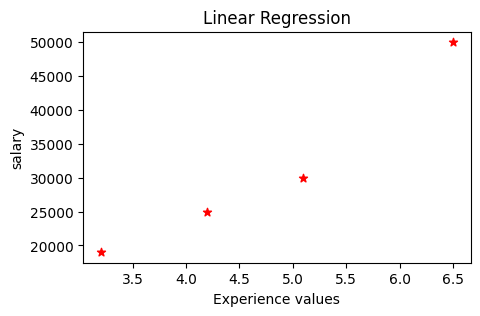

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Linear Regression')
plt.xlabel('Experience values')
plt.ylabel('salary')
plt.scatter(x=x_train,y=y_train,color='r',marker='*')
plt.show()

In [ ]:
x_train=x_train.values.reshape(-1,1)   # converting to 2d

In [ ]:
x_train.ndim

2

In [ ]:
from sklearn.linear_model import LinearRegression  # LR is a class
reg=LinearRegression() # reg is a object for LinearRegression class

In [ ]:
reg.fit(x_train,y_train)  #Training the Model

LinearRegression()

# checking algorithm

In [ ]:
#Salary = m×(YearsOfExperience)+c
#  ex:- Salary = 7200 × Experience + 1500
reg.coef_ #  M-value
#For every 1 year increase in experience, salary increases

array([9303.9049236])

In [ ]:
# C-value
reg.intercept_ #When experience = 0, predicted salary

np.float64(-13193.548387096766)

In [ ]:
x_train

array([[5.1],
       [6.5],
       [4.2],
       [3.2]])

In [ ]:
ans_from_model=reg.predict(x_train) #Predicting Salary
ans_from_model

array([34256.36672326, 47281.8336163 , 25882.85229202, 16578.94736842])

In [ ]:
training_data['Ans_from_model']=ans_from_model # creating new column
training_data

,x_train,y_train,Ans_from_model
5,5.1,30000,34256.366723
2,6.5,50000,47281.833616
4,4.2,25000,25882.852292
3,3.2,19000,16578.947368


In [ ]:
# y = actual values (ans from text book)
# y_bar = predicted values by Model (John giving answers on saturday)

In [ ]:
# Training Loss
# Loss or error or residual = actual values - predicted values

#evaluate how good your regression model is.

In [ ]:
# MEAN SQUARE ERROR by manually
s=0
for i in training_data.index:
  s=s+(training_data['y_train'][i]-training_data['Ans_from_model'][i])**2
print(f'Loss value from MSE {s/len(training_data)}')

Loss value from MSE 8036502.546689299


In [ ]:
#Minimize the error between actual and predicted values
from sklearn.metrics import mean_squared_error  # using fun
mean_squared_error(y_train,ans_from_model)

8036502.546689299

In [ ]:
# root mean square error by manulaay
s=0
for i in training_data.index:
  s=s+(training_data['y_train'][i]-training_data['Ans_from_model'][i])**2
print(f'Loss value from MSE {np.sqrt(s/len(training_data))}')

Loss value from MSE 2834.8725803269003


In [ ]:
from sklearn.metrics import root_mean_squared_error  # using fun
root_mean_squared_error(y_train,ans_from_model)

2834.8725803269003

In [ ]:
# Train Accuracy  by manually
numerator=0
denominator=0
for i in training_data.index:
  numerator=numerator+(training_data['y_train'][i]-training_data['Ans_from_model'][i])**2
  denominator=denominator+(training_data['y_train'][i]-training_data['y_train'].mean())**2
print(f'Train Accuracy By r2_score formula : {1-(numerator)/denominator}')

Train Accuracy By r2_score formula : 0.940690018105614


In [ ]:
#by using fun
from sklearn.metrics import r2_score
r2_score(y_train,ans_from_model)

0.940690018105614

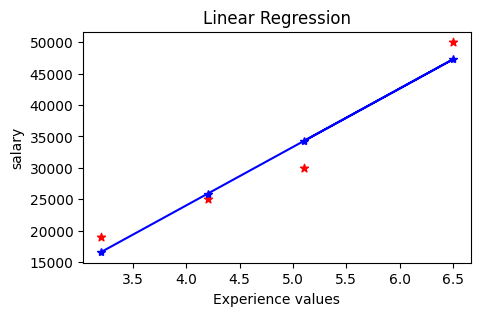

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Linear Regression')
plt.xlabel('Experience values')
plt.ylabel('salary')
plt.scatter(x=x_train,y=y_train,color='r',marker='*')
plt.plot(x_train,ans_from_model,color='blue',marker='*')
plt.show()

#testing data

In [ ]:
testing_data

,x_test,y_test
0,1.4,10000
1,2.8,15000


In [ ]:
ans_test=reg.predict(x_test.values.reshape(-1,1))
ans_test

array([ -168.08149406, 12857.38539898])

In [ ]:
testing_data['test_ans']=ans_test
testing_data

,x_test,y_test,test_ans
0,1.4,10000,-168.081494
1,2.8,15000,12857.385399


In [ ]:
mean_squared_error(y_test,ans_test)

53990339.29914875

In [ ]:
root_mean_squared_error(y_test,ans_test)

7347.811871513094

In [ ]:
print(f'accuracy {r2_score(y_test,ans_test)}')

accuracy -7.6384542878638


#checking with own data

In [ ]:
9303.9049236 * 15 + -13193.548387096766

126365.02546690323

In [ ]:
reg.predict([[15]])  # 2d data only model will take

array([126365.02546689])